<center><h2> CPE 4040 Spring 2022: Midterm Exam 2 </h2></center>
<center><h2>Johnny Lozano</h2></center>

### This is a two-part exam:
 * Part 1: Problem solving
 * Part 2: Semi-guided project for exploratory data analysis

### General guidelines:
 * Do your coding in a clean and logical manner.
 * Make comments on your codes. Make insightful observations after the analysis.
 * This is an individual assignment.
 * No plagiarism: you are encouraged to do reseach, however, do your own work. Do not copy-and-paste other people's work.    

### Submission:
 * Submit this notebook file and the pdf file - remember to add your name in in the filenames.
 * Deadline: 11:59 pm, 4/15 (Friday)

<h3> Import Python Tool Modules First</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h2>Part 1: Baby Name Dataset Analysis (40 Points)</h2>

In this dataset, baby names in the US from 2004 to 2014 are tablulated by gender, year, and State.

### First step: import the dataset (in csv format) from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv). 

<h3>Q1. Read the dataset and assign it to a dataframe called baby_names. Display the first 10 rows of the dataset.</h3>

In [2]:
baby_names = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv')

baby_names.head(10)

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


<h3>Q2. The first two columns "Unnamed: 0" and "Id" do not seem useful. Please remove them and display the first 5 rows of the new dataframe.</h3> 

In [3]:
# deletes Unnamed: 0
del baby_names['Unnamed: 0']

# delete Id
baby_names.drop('Id', axis='columns', inplace=True)
#del baby_names['Id']

baby_names.head()

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41


<h3>Q3. According to this dataset, how many babies were born each year from 2004 to 2014? Show the results and plot a vertical bar chart for the new-born numbers from 2004 to 2014.</h3>

Year
2004    3293984
2005    3305315
2006    3387737
2007    3412417
2008    3340318
2009    3232116
2010    3116548
2011    3079145
2012    3073858
2013    3066443
2014    3113611
Name: Count, dtype: int64


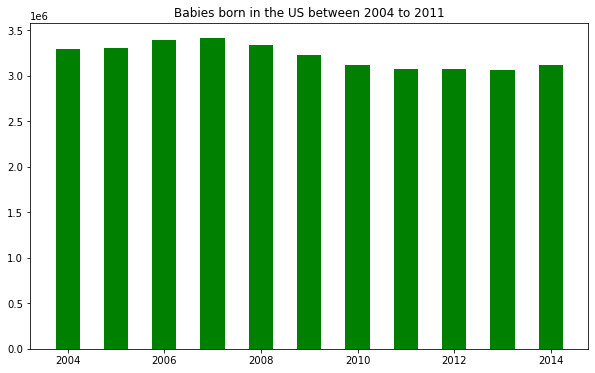

In [4]:
# 1. Apply groupby('Year')
# 2. Extract the "Count" column data
# 3. Aggregate with sum() function

year_count = baby_names.groupby('Year').Count.sum()
print (year_count)

# Observe that 2004 to 2011 are the first 8 entries in year_count.
#year_count[:7]

years = year_count.index
#print (years)

plt.figure(figsize=(10,6))
width = 0.5
plt.bar(years, year_count, color='green', width=0.5)

plt.title('Babies born in the US between 2004 to 2011')
plt.show()

<h3>Q4. How many boys (M) and girls (F) were born each year from 2004 to 2014? Show the results and plot a stacked bar chart, one for boys and one for girls. Please add a legend. </h3>

MultiIndex([(2004, 'F'),
            (2004, 'M'),
            (2005, 'F'),
            (2005, 'M'),
            (2006, 'F'),
            (2006, 'M'),
            (2007, 'F'),
            (2007, 'M'),
            (2008, 'F'),
            (2008, 'M'),
            (2009, 'F'),
            (2009, 'M'),
            (2010, 'F'),
            (2010, 'M'),
            (2011, 'F'),
            (2011, 'M'),
            (2012, 'F'),
            (2012, 'M'),
            (2013, 'F'),
            (2013, 'M'),
            (2014, 'F'),
            (2014, 'M')],
           names=['Year', 'Gender'])


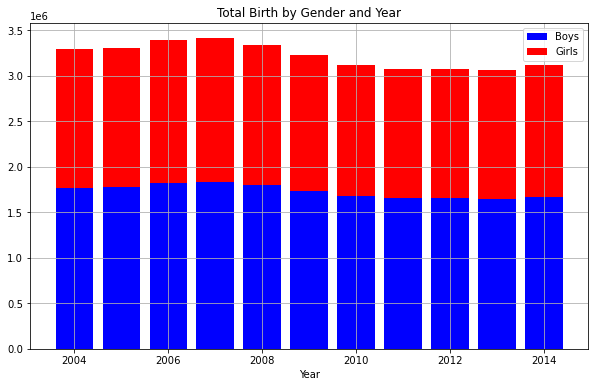

In [5]:
year_gender_count = baby_names.groupby(['Year','Gender']).Count.sum()

print (year_gender_count.index)

# This is the X axis label 
years = np.arange(2004,2015)

yearly_F = year_gender_count[:,'F']
yearly_M = year_gender_count[:,'M']

plt.figure(figsize=(10,6))

plt.bar(years, yearly_M, color='blue', label='Boys')
plt.bar(years, yearly_F, bottom=yearly_M, color='red', label='Girls')

plt.xlabel('Year')
plt.grid(True, which='both')
plt.title('Total Birth by Gender and Year')
plt.legend(loc='upper right')

plt.show()

<h3>Q5. Are there more male names or female names in the dataset?</h3>

In [6]:
baby_names['Gender'].value_counts()

F    558846
M    457549
Name: Gender, dtype: int64

<h3>Q6. What is the most popular boy's name from 2004 to 2014? What is the most popular girl's name from 2004 to 2014?</h3>

In [7]:
# Groupby "Gender" & Name" then summation over the Count column data 
#names = baby_names.groupby(['Gender','Name']).sum()

#names.Count.idxmax()  


# Sort the "Count" column in descending order
#a = names.sort_values('Count', ascending=False)

girls = baby_names.groupby('Gender').get_group('F')
girls_names = girls.groupby('Name').sum()
print (girls_names)
print ("The most popular girl's name is", girls_names.Count.idxmax())

boys = baby_names.groupby('Gender').get_group('M')
boys_names = boys.groupby('Name').sum()
print ("The most popular boy's name is", boys_names.Count.idxmax())

         Year  Count
Name                
Aadhya  80515    453
Aadya   72455    300
Aahana  30165    124
Aahna    2014      7
Aaima    2013      5
...       ...    ...
Zyonna  22108     61
Zyra    14085     42
Zyrah    4024     11
Zyria   20089     59
Zyriah  18087     58

[10929 rows x 2 columns]
The most popular girl's name is Emma
The most popular boy's name is Jacob


<h3>Q7. For the State of Texas, what was the most popular boy's name in 2005? How about girl's name?</h3>

In [8]:
# There are basically three groups: Year, Gender and State
#baby = baby_names.groupby(['Year','State','Name']).Count.sum()

baby = baby_names.groupby(['Year','State']).get_group((2005, 'TX'))
print (baby)

girls = baby.groupby('Gender').get_group('F')

girls_names = girls.groupby('Name').sum()

print ("The most popular girl's name in 2005 for Texas was", girls_names.Count.idxmax())

boys = baby.groupby('Gender').get_group('M')
boys_names = boys.groupby('Name').sum()
print ("The most popular boy's name in 2005 for Texas was", boys_names.Count.idxmax())

           Name  Year Gender State  Count
849406    Emily  2005      F    TX   2480
849407      Mia  2005      F    TX   1653
849408  Madison  2005      F    TX   1621
849409   Ashley  2005      F    TX   1587
849410     Emma  2005      F    TX   1481
...         ...   ...    ...   ...    ...
890492     Zade  2005      M    TX      5
890493    Zahir  2005      M    TX      5
890494  Zakkery  2005      M    TX      5
890495    Zarek  2005      M    TX      5
890496   Zavian  2005      M    TX      5

[5799 rows x 5 columns]
The most popular girl's name in 2005 for Texas was Emily
The most popular boy's name in 2005 for Texas was Jose


<h3>Q8. Let's see how popular your name is in the US. </h3>

<h3>How many babies in this data set have the same first name as you? </h3>

In [9]:
bool_J = (baby_names['Name'] == 'Johnny')
total_J = baby_names.loc[bool_J, 'Count'].sum()

print ("Number of babies named Johnny:", total_J)

Number of babies named Johnny: 14498


## Part 2: The PIMA Diabetic Data Set (60 Points)

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. It consists of several diagnostic measurements from female patients at least 21 years old of Pima Indian heritage. It also shows the diagnosis on whether the patients have diabetes mellitus disease.

### The filename of the dataset is "diabetes.csv" that comes with this assignment.

The dataset contains the following features/columns:

 * Pregnancies: Number of times pregnant
 * Glucose: Plasma glucose concentration at 2 hour in an oral glucose tolerance test (mg/dL)
 * BloodPressure: Diastolic blood pressure (mm Hg)
 * SkinThickness: Triceps skin fold thickness (mm)
 * Insulin: 2-hour serum insulin level (mu U/ml)
 * BMI: Body mass index (weight in kg/(height in m)^2)
 * DiabetesPedigreeFunction: a function which scores likelihood of diabetes based on family history
 * Age: age of patients (years)
 * Outcome: class variable 0 or 1 indicating disease (0: non-diabetic, 1: diabetic)


## Part 2.1: Data Preparation and Cleaning (15 points)

Some typical tasks in this part include:
 1. Load the dataset in a data frame
 2. Examine the dataset attributes: index, columns, range of values etc.
 3. Handle missing and invalid data

### Note: Mandatory work on handling missing data:
   **Q1: Are there missing values in the data set? Write a code to find out.**
   
   **Q2: You may notice some of the columns have unreasonable zero values (for example, Glucose and BMI). Identify those columns and replace the zeros with the median value of that column.**

In [10]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.info()                            # Info to display

diabetes.isna().sum()                      # no null/unreasonable values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Part 2.2: Exploratory Data Analysis and Visualization (20 points)

You are expected to perform some basic data analysis and create **3 different charts**. Some examples are:
 * Distribution of numeric columns using histogram or bar charts;
 * Relationship between column data using scatter plots or pairplot.

Please make comments on the insights from the exploratory analysis.

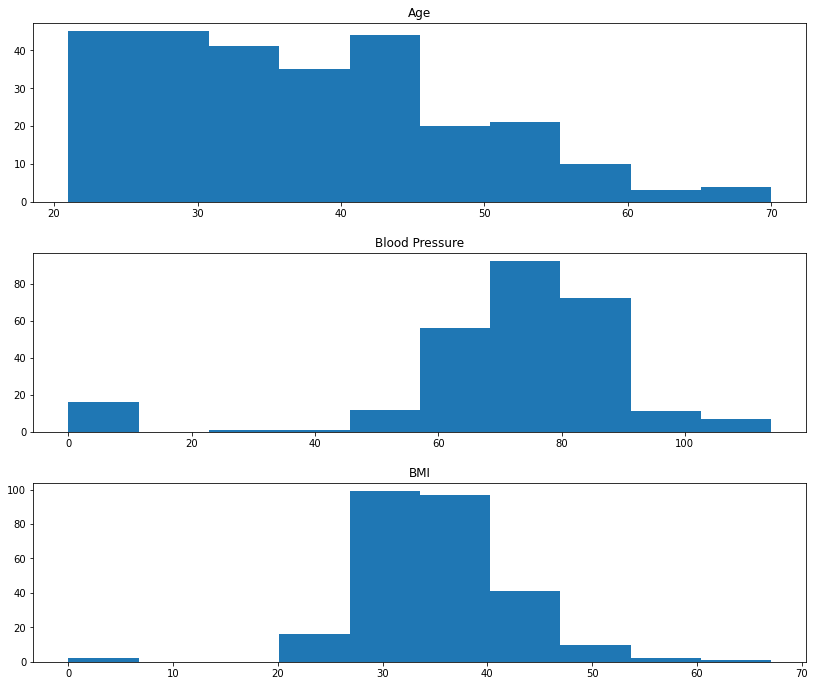

In [11]:
# This is setting up data for people with diabetes
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))
fig.tight_layout(pad=3.0)

ax[0].set_title('Age')                          # To my surprise, it seems young adult/middle age has 
ax[0].hist(diabetes.Age[diabetes.Outcome==1]);  # more cases of diabetes than the elderly

ax[1].set_title('Blood Pressure')                         # Another interesting thing is that the people in this dataset
ax[1].hist(diabetes.BloodPressure[diabetes.Outcome==1]);  # with diabetes have normal, healthy blood pressure ranges for the
                                                          # part

ax[2].set_title('BMI')                                 # My assumption was right on this one, higher BMI ranges
ax[2].hist(diabetes.BMI[diabetes.Outcome==1]);         # do have a *correlation* (can't quite confirm causation) to diabetes

## Part 2.3: In-Depth Analysis (25 points)

In this section, you will come up with **three interesting questions** about the dataset and write codes to answer the questions. For example, you may analyze how individual feature (column data) impacts the outcome of the diagnosis.

Some example questions:
 1. Do older women have higher chances of getting diabetes? You may need to create a bar chart with women in different age groups and show the percentage and/or total number of diabetic vs. non-diabetic in each group.
 2. Based on BMI data, how many of this group of patients are considered underweight, normal, overweight, obese (class I, II, and III)? You need to research to find out the definitions.
 3. Does high glucose level mean high risk for diabetes? You may want to analyze the relationship between glucose level and the diagnosis outcome. 

### Background:

It seems that general health factors such as age and blood pressure do not show clear correlation between a person's likelihood at having diabetes. However, BMI shows a very strong correlation between health and diabetes. The overweight range is 25-29.9 and the obese range is above 30 [1] which is where the concentration of people with diabetes lie.

However, not enough data has been shown to conclude that diabetes is simply from weigth and lifestyle factos. Now I want to explore further to see what other physical and genetric factors play a role in a person's likelihood in getting diabetes.

[1] Source: https://www.nhs.uk/common-health-questions/lifestyle/what-is-the-body-mass-index-bmi/#:~:text=BMI%20ranges&text=below%2018.5%20%E2%80%93%20you're%20in,re%20in%20the%20obese%20range

**Question 1: Do insulin levels affect the likelihood of someone having diabetes?**

First, I would like to explore deeper into the causes of diabetes. Insulin levels are a hormone in the human body which help in breaking down glucose. The levels of glucose in the human body can be affected by a combination of genetic family history and lifestyle choices [2]. 

[2] Source: https://pubmed.ncbi.nlm.nih.gov/12643127/



**Question 2: Do glucose levels affect the likelihood of someone having diabetes?**

If a strong correlation is shown between insulin levels and diabetes, then it is imperative that a strong correlation between glucose levels and diabetes is also shown. Glucose, also known as blood sugar, is the body's main source of energy. If the glucose levels are too high, then it can cause an array of health issues besides diabetes [3].

[3] Source: https://medlineplus.gov/bloodsugar.html#:~:text=Blood%20sugar%2C%20or%20glucose%2C%20is,sugar%20levels%20are%20too%20high.



**Question 3: Is diabetes genetic or environmental?**

Assuming that a correlation between insulin levels and glucose levels have been confirmed, the last question is how much does genetic family history play a role in someone's likelihood in developing diabetes? It becoming increasingly prevalent that the risk of diabetes can be reduced with lifestyle changes, but how much risk does a person with a family history of diabetes possess [4]?

[4] Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8306487/

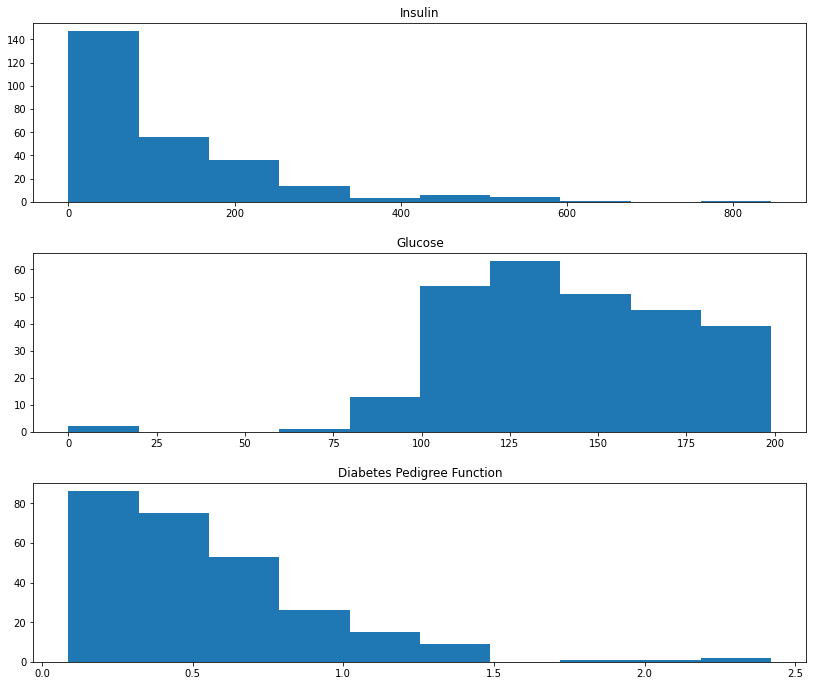

In [12]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))
fig.tight_layout(pad=3.0)

ax[0].set_title('Insulin')
ax[0].hist(diabetes.Insulin[diabetes.Outcome==1]);

ax[1].set_title('Glucose')
ax[1].hist(diabetes.Glucose[diabetes.Outcome==1]);

ax[2].set_title('Diabetes Pedigree Function')
ax[2].hist(diabetes.DiabetesPedigreeFunction[diabetes.Outcome==1]);

### Conclusion:

According to the data, diabetes is most likely linked to the body producing insufficient amounts of insulin and unable to regulate high amounts of glucose. BMI is a very general measurement of lifestyle and overall health, but a strong correlation between people with diabetes and people who are in the overweight and obese range has been shown. Likewise, changing one's lifestyle has been shown to increase insulin and reduce the likelihood of developing diabetes [2]. However, a correlation has been shown with people with diabetes and people with a family history of diabetes as well. Furthermore, evidence that genetic pedigree increases one's likelihood of developing diabetes has been shown as well [4]. In short, a person's likelihood of developing diabetes is more complex because it is affected by both genetic and environmental factors, but a person's lifestyle has a great impact on reducing the risk of diabetes.